### Linear regression

Problem statement

A company is trying to decide whether to focus their efforts on their mobile app experience or their website. Help the company to take a decision using data driven models

In [34]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score

In [3]:
## Set working directory
os.chdir(r'C:\Users\rahul.padinjarayil\Downloads')

In [10]:
customer_data = pd.read_csv('Ecommerce Customers.csv')

In [56]:
customer_data.head()

,Email,Address,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",34.305557,12.049861,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",33.330673,12.795189,37.536653,4.446308,599.406092


### EDA steps

In [14]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avg. Session Length   500 non-null    float64
 3   Time on App           498 non-null    float64
 4   Time on Website       500 non-null    float64
 5   Length of Membership  500 non-null    float64
 6   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(2)
memory usage: 27.5+ KB


In [ ]:
## Treat the missing values with mean

In [13]:
customer_data['Avg. Session Length'].fillna(np.mean(customer_data['Avg. Session Length']),inplace=True)

In [15]:
customer_data['Time on App'].fillna(np.mean(customer_data['Time on App']),inplace=True)

In [16]:
df = customer_data.drop(['Email','Address'],axis=1)

In [18]:
## Correlation between diffrent features and Target variable

<AxesSubplot:>

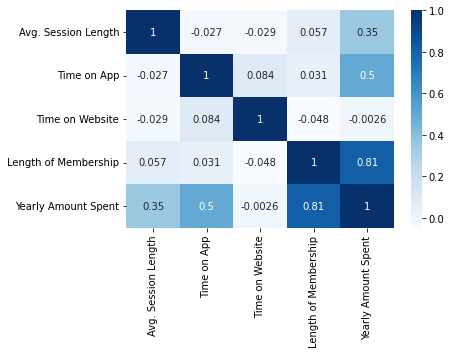

In [17]:
sns.heatmap(df.corr(),cmap = 'Blues', annot=True)

In [19]:
## Model Building

In [20]:
X = customer_data[['Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership']]
y= customer_data['Yearly Amount Spent']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [48]:
LR = LinearRegression()

In [49]:
LR.fit(X_train,y_train)

LinearRegression()

In [50]:
LR.coef_

array([26.18735662, 38.65475567,  0.27709407, 61.38934106])

In [30]:
## Prediction on test data set

In [51]:
y_pred_test = LR.predict(X_test)

In [52]:
## R - sqaure for Train data set
y_pred_train = LR.predict(X_train)
print("Train Data R-square: " ,r2_score(y_train,y_pred_train))

Train Data R-square:  0.9800814275196967


In [53]:
print("Test Data R-square: " ,r2_score(y_test,y_pred_test))

Test Data R-square:  0.9861184872731278


In [54]:
coeffecients = pd.DataFrame(LR.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Avg. Session Length,26.187357
Time on App,38.654756
Time on Website,0.277094
Length of Membership,61.389341


### Conclusion
These numbers mean that holding all other features fixed, a 1 unit increase in Avg. Session Length will lead to an increase in $25.98 in Yearly Amount Spent, and similarly for the other features

So as Time on App is a much more significant factor than Time on Website, the company could focus all the attention into the App as that is what is bringing the most money in